<a href="https://colab.research.google.com/github/dt2229/bias_in_publications/blob/bhavna/CNN_Glove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install glove_python_binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 974 kB 4.0 MB/s 


In [2]:
import re
import numpy as np
import nltk
from glove import Corpus, Glove
from nltk.tokenize import sent_tokenize, word_tokenize
from multiprocessing import Pool
from scipy import spatial
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
ls

 all_cnn_text_combined.csv    Fox.csv             NYT.csv
 all_fox_text_combined.csv   'Fox Glove.ipynb'    simlex999.csv
 cnn.csv                      Fox.gsheet          SimLex-999.txt
'CNN Glove.ipynb'             glove.6B.100d.txt
 cnn_link_text_combined.csv   Glove.ipynb


In [52]:
CNN_sample = open("/content/drive/My Drive/NLP Project Space/all_cnn_text_combined.csv")
CNN = CNN_sample.read()

In [53]:
nltk.download('punkt')
n = CNN.replace("\n", " ")
CNN_data = []
for i in sent_tokenize(n):
    temp = []
    for j in word_tokenize(i):
        temp.append(j.lower())
    CNN_data.append(temp)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [54]:
for i in range(len(CNN_data)):
    CNN_data[i] = [word.lower() for word in CNN_data[i] if re.match('^[a-zA-Z]+', word)]  

In [55]:
corpus = Corpus()
corpus.fit(CNN_data, window = 3)
glove = Glove(no_components = 30, learning_rate = 0.1)
glove.fit(matrix = corpus.matrix, epochs = 30, no_threads = Pool()._processes, verbose = True)

Performing 30 training epochs with 2 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [56]:
glove.add_dictionary(corpus.dictionary)

In [57]:
import random
from random import randint
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.decomposition import PCA

In [58]:
woman_sim = glove.most_similar('woman', number = 50)
man_sim = glove.most_similar('man', number = 50)
df = pd.DataFrame(woman_sim)
df.head(4)

,0,1
0,black,0.836530
1,elected,0.814686
2,longest-serving,0.791476
3,first,0.670687


In [59]:
def vector_converter(word):
    idx = glove.dictionary[word]
    return glove.word_vectors[idx]

In [60]:
def cosine_similarity(v1, v2):
    return 1 - spatial.distance.cosine(v1, v2)

In [61]:
def pair_sim(pair):
  v1 = vector_converter(pair[0])
  v2 = vector_converter(pair[1])
  sim = cosine_similarity(v1,v2)
  return sim

In [62]:
v1 = vector_converter('woman')
v2 = vector_converter('man')
cosine_similarity(v1, v2)

0.3110981907989243

In [63]:
def glove_analogy(word_a, word_b, word_c):
    """
    Performs the word analogy task as explained above: a is to b as c is to ____. 
    
    Arguments:
    word_a -- a word, string
    word_b -- a word, string
    word_c -- a word, string
    word_to_vec_map -- dictionary that maps words to their corresponding vectors. 
    
    Returns:
    best_word --  the word such that v_b - v_a is close to v_best_word - v_c, as measured by cosine similarity
    """
    
    word_a, word_b, word_c = word_a.lower(), word_b.lower(), word_c.lower()
    
    e_a, e_b, e_c = vector_converter(word_a), vector_converter(word_b), vector_converter(word_c)
    
    words = corpus.dictionary
    max_cosine_sim = -100              
    best_word = None                   
    for w in words:        
        if w in [word_a, word_b, word_c] :
            continue
        cosine_sim = cosine_similarity(e_b - e_a, vector_converter(w) - e_c)     
 
        if cosine_sim > max_cosine_sim:
            max_cosine_sim = cosine_sim
            best_word = w
        
    return best_word

In [66]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
words =  list(corpus.dictionary.keys())
gen_words = gendered_stuff = ['queen', 'mother', 'princess', 'teacher', 'nurse', 'sister', 'caretaker', 'secretary', 'model', 'daughter']
#words_no_sw = [word for word in words if not word in stopwords.words()]
#vectors = [vector_converter(word) for word in words_no_sw]
gen_vec = [vector_converter(word) for word in gen_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
triad=['woman', 'daughter', 'man']
print ('{} -> {} : {} -> {}'.format(triad[0],triad[1],triad[2], glove_analogy(triad[0],triad[1],triad[2])))

woman -> daughter : man -> mom


In [68]:
simlex999 = pd.read_csv("/content/drive/My Drive/NLP Project Space/simlex999.csv").iloc[:,0:3]
simlex999.head(10)
simlex_pairs = simlex999.iloc[:,0:2]

In [69]:
def sim(idx):
  glove_sim = pair_sim([simlex_pairs.loc[idx][0], simlex_pairs.loc[idx][1]])
  simlex_sim = simlex999.iloc[idx][2] 
  print(simlex_sim, glove_sim, simlex_pairs.loc[idx])

In [70]:
sim(234)

9.461538462 0.3793645908256159 word 1    attorney
word 2      lawyer
Name: 234, dtype: object


In [71]:
analogous = [glove_analogy('woman', gender, 'man') for gender in gen_words]
analogous + gen_words

['jeff',
 'monday',
 'inc.',
 'poll',
 'exclusive',
 'exclusive',
 'reston',
 'nancy',
 'daniel',
 'mom',
 'queen',
 'mother',
 'princess',
 'teacher',
 'nurse',
 'sister',
 'caretaker',
 'secretary',
 'model',
 'daughter']

In [72]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
def plot_data(orig_data, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(orig_data)
    plt.figure(figsize=(7, 5), dpi=100)
    plt.plot(data[:,0], data[:,1], '.')
    for i in range(len(data)):
        plt.annotate(labels[i], xy = data[i])
    for i in range(len(data)//2):
        plt.annotate("",
                xy=data[i],
                xytext=data[i+len(data)//2],
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3")
        )

In [73]:
labels = analogous + gen_words
data = [vector_converter(w) for w in labels]

Text(0.5, 1.0, 'CNN')

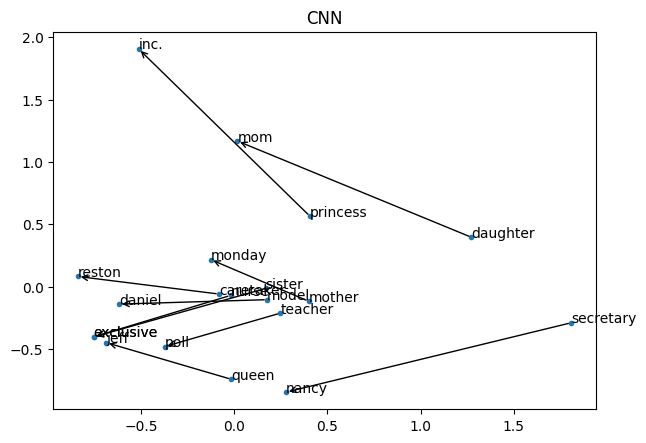

In [74]:
plot_data(data, labels)
plt.title('CNN')

In [75]:
gender_pairs = [
    ("she", "he"),
    ("her", "his"),
    ("woman", "man"),
    ("herself", "himself"),
    ("daughter", "son"),
    ("mother", "father"),
    ("girl", "boy"),
]
male_words = ["he","his","man","himself","son","father","boy"]
female_words = ["she","her","woman","herself","daughter","mother","girl"]

In [76]:
gender_vectors = [
  vector_converter(pair[0]) - vector_converter(pair[1])
  for pair in gender_pairs
]
gender_vector = np.mean(gender_vectors, axis=0)

In [77]:
male_projections = [np.dot(vector_converter(word), gender_vector) for word in male_words]
female_projections = [np.dot(vector_converter(word), gender_vector) for word in female_words]

mean_male_projection = np.mean(male_projections)
mean_female_projection = np.mean(female_projections)

In [78]:
def word_bias(test_word):
  test_word_projection = np.dot(vector_converter(test_word), gender_vector)
  mean_projection = (mean_male_projection + mean_female_projection) / 2
  test_word_score = 2 * (test_word_projection - mean_projection) / (mean_female_projection - mean_male_projection)
  return test_word_score  

In [79]:
fem = []
male = []
for i in range(len(words)):
  if word_bias(words[i]) > 0:
    fem.append(i)
  else:
    male.append(i)